Build the following regressor models,  using the Lyons housing data set.  We have seen all these models as classifiers, we will now build regressors for the Lyon's housing data model.   We will just re-use this data set again,  you have it set up already so it is easy to re-use.

      -A random forest model using mse or some variation on it as the loss.    Do some hyperparameter tuning of the model, and then show the importance of the features and

          use either SHAP or ELI5 as well

      -Build a boosted model,  using either XGBoost or the sklearn boost system,   again do a bit of a hyperparameter search and either an ELI5 or Shap check of the predictor

        relative importance.   SHAP appears to work well with XGBoost

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#load the data, change the file address

infile= "lyon_housing.csv"
lyon=pd.read_csv(infile)

In [50]:
lyon.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


In [51]:
lyon['date_transaction']=pd.to_datetime(lyon['date_transaction'])

In [52]:
lyon['date_transaction'].head()

0   2019-10-31
1   2018-11-26
2   2016-08-04
3   2016-11-18
4   2016-12-16
Name: date_transaction, dtype: datetime64[ns]

In [53]:
lyon['year_transaction']=lyon['date_transaction'].dt.year

In [54]:
lyon['date_construction']=pd.to_datetime(lyon['date_construction'])

In [55]:
lyon['year_construction']=lyon['date_construction'].dt.year

In [56]:
lyon.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058,2016,2003
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719,2016,2003


In [57]:
temp=pd.cut(lyon.anciennete,bins=[-5,0,5,10,20,30,40],labels=['UnderConstruction','0-5','5-10','10-20','20-30','30+'])

In [58]:
lyon['age']=temp

In [59]:
lyon.head(3)

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction,age
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003,10-20
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003,10-20
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003,10-20


In [60]:
lyon = lyon.drop(labels="surface_terrain", axis=1)

In [61]:
lyon = lyon.drop(labels="surface_carrez_logement", axis=1)

In [62]:
#going to to impute all strings with the most frequent string
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Impute catagorical data

# I should keep commune out perhaps as they are all commune, however I will keep it in there because you wanted it
# There is also no nan values in that column but I just need it in the data frame

imp = SimpleImputer(strategy="most_frequent")
StringImpuing= pd.DataFrame(imp.fit_transform(lyon[["type_achat","type_bien","commune","age"]]), columns = ["type_achat","type_bien","commune","age"])

#Impute Continuous Data with the median value

impCont = SimpleImputer(strategy="median")
continuousImputing= pd.DataFrame(impCont.fit_transform(lyon[["nombre_pieces","surface_logement","nombre_parkings"]]), columns = ["nombre_pieces","surface_logement","nombre_parkings"])




In [63]:
# Combine string imouting with year transaaction

CatagoricalVariable = pd.concat([StringImpuing,lyon["year_transaction"]],axis = 1)
CatagoricalVariable["year_transaction"]


0        2019
1        2018
2        2016
3        2016
4        2016
         ... 
40511    2020
40512    2020
40513    2020
40514    2020
40515    2020
Name: year_transaction, Length: 40516, dtype: int64



```
# This is formatted as code
```

#one hot encode the categories

In [64]:
from sklearn.preprocessing import OneHotEncoder

encode_lyon=OneHotEncoder()

encode_lyon_fit1= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[0]].to_numpy().reshape(-1,1))
df_type_achat=pd.DataFrame(encode_lyon_fit1.toarray(),columns=encode_lyon.categories_[0][:])

encode_lyon_fit2= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[1]].to_numpy().reshape(-1,1))
df_type_2=pd.DataFrame(encode_lyon_fit2.toarray(),columns=encode_lyon.categories_[0][:])

encode_lyon_fit3= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[2]].to_numpy().reshape(-1,1))
df_type_3=pd.DataFrame(encode_lyon_fit3.toarray(),columns=encode_lyon.categories_[0][:])

encode_lyon_fit4= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[3]].to_numpy().reshape(-1,1))
df_type_4=pd.DataFrame(encode_lyon_fit4.toarray(),columns=encode_lyon.categories_[0][:])



encode_lyon_fit5= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[4]].to_numpy().reshape(-1,1))
stringCon= encode_lyon.categories_[0][:].astype(str)
df_type_5=pd.DataFrame(encode_lyon_fit5.toarray(),columns=encode_lyon.categories_[0][:])

df_type_5.columns=stringCon




#df_type_5=pd.DataFrame(encode_lyon_fit5.toarray(),columns=df5Names)


In [65]:
# concatenate these one-hot-encoded versions of the categorical variables

df_cats_lyon=pd.concat([df_type_achat,df_type_2,df_type_3,df_type_4,df_type_5], axis=1)
df_cats_lyon.head()

,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,...,20-30,30+,5-10,UnderConstruction,2016,2017,2018,2019,2020,2021
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#Standardization

#standard scale the other data

###Not going to create a pipeline as I already imputed everything.

In [66]:
continuousImputing.columns

Index(['nombre_pieces', 'surface_logement', 'nombre_parkings'], dtype='object')

In [67]:
scaler = StandardScaler()

lyons_continuous = scaler.fit_transform(continuousImputing)

In [68]:
lyons_continuous=pd.DataFrame(lyons_continuous,columns=continuousImputing.columns)
lyons_continuous

,nombre_pieces,surface_logement,nombre_parkings
0,1.870396,1.231567,-0.996559
1,-0.671310,-0.469113,-0.996559
2,-1.518546,-1.319453,0.666260
3,0.175925,0.062349,0.666260
4,-1.518546,-1.319453,0.666260
...,...,...,...
40511,-0.671310,-1.106868,0.666260
40512,-0.671310,-1.142299,-0.996559
40513,-0.671310,-1.496607,-0.996559
40514,-0.671310,-1.106868,-0.996559


In [69]:
lyon_housing_final = pd.concat([df_cats_lyon,lyons_continuous],axis=1)

In [70]:
lyon_housing_final.columns

Index(['VEFA', 'ancien', 'appartement', 'maison', 'Lyon 1er Arrondissement',
       'Lyon 2e Arrondissement', 'Lyon 3e Arrondissement',
       'Lyon 4e Arrondissement', 'Lyon 5e Arrondissement',
       'Lyon 6e Arrondissement', 'Lyon 7e Arrondissement',
       'Lyon 8e Arrondissement', 'Lyon 9e Arrondissement', 'Villeurbanne',
       '0-5', '10-20', '20-30', '30+', '5-10', 'UnderConstruction', '2016',
       '2017', '2018', '2019', '2020', '2021', 'nombre_pieces',
       'surface_logement', 'nombre_parkings'],
      dtype='object')

In [71]:
y=lyon.loc[:,'prix']
type(y)

pandas.core.series.Series

  ###A random forest model using mse or some variation on it as the loss.    Do some hyperparameter tuning of the model, and then show the importance of the features and use either SHAP or ELI5 as well

      

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(lyon_housing_final,y, test_size=0.2)

In [73]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=500, max_leaf_nodes=8, criterion="friedman_mse",n_jobs=-1)
regr.fit(X_train,y_train)
y_pred_rf = regr.predict(X_test)

In [74]:
len(y_pred_rf)

8104

In [75]:
len(y_test)

8104

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_rf)

0.5851214812148019

THis is bad compared to a nural net with a r2_score of 0.74

Grid Search for best hyper parameters I did a couple so I don't wait for a day.

In [77]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators': [100, 200,500],'max_leaf_nodes':[6,8,10]}
grid_clf_acc = GridSearchCV(regr, param_grid = grid_values,scoring = 'r2')
grid_clf_acc.fit(X_train, y_train)
y_pred_acc = grid_clf_acc.predict(X_test)

In [78]:
grid_clf_acc.best_params_

{'max_leaf_nodes': 10, 'n_estimators': 100}

Lets implement it

In [79]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=200, max_leaf_nodes=10, criterion="friedman_mse",n_jobs=-1)
regr.fit(X_train,y_train)
y_pred_rf = regr.predict(X_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_rf)

0.5998968668809865

Hey 1% increase!

In [81]:
!pip install shap

In [82]:
import shap

In [83]:
explainer = shap.TreeExplainer(regr,X_train)

In [84]:
shap_values = explainer.shap_values(X_test)

 95%|=================== | 7690/8104 [00:19<00:01]       

In [85]:
X_test.columns == lyon_housing_final.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

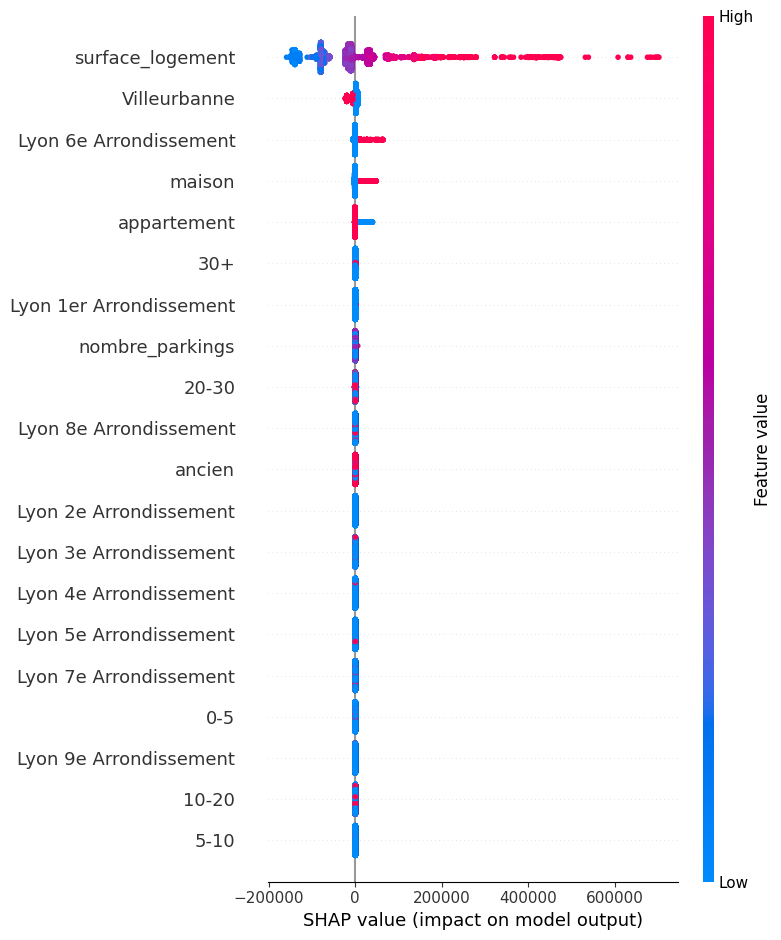

In [86]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,X_test,feature_names=lyon_housing_final.columns)

# Surface Logement seems to have the greatest impact on shap value and the only one with any significant impact where high shap value coresponds to high feature value and low feature value with low shap value.

  -Build a boosted model,  using either XGBoost or the sklearn boost system,   again do a bit of a hyperparameter search and either an ELI5 or Shap check of the predictor

    relative importance.   SHAP appears to work well with XGBoost

In [87]:

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [88]:
y_train

5742     158000.0
6776     105186.0
33148    228000.0
22735    164000.0
4111     155600.0
           ...   
14261    169000.0
6454     175000.0
17648    188000.0
31314    217721.0
22936    224000.0
Name: prix, Length: 32412, dtype: float64

# THis XG boost is too slow I am going to run something else. NO wonder I ran a classifier I want to rip my hair out.

In [90]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
y_pred2 = xgb_reg.predict(X_test)



In [92]:
print (r2_score(y_test,y_pred2))

0.7459927634450971


In [94]:
from sklearn.model_selection import GridSearchCV
param_grid2 = {"max_depth":    [4, 5, 6],
              "learning_rate": [0.01, 0.015]}
grid_clf_acc2 = GridSearchCV(xgb_reg, param_grid = param_grid2, scoring = 'r2')
grid_clf_acc2.fit(X_train, y_train)
y_pred_acc2 = grid_clf_acc.predict(X_test)

In [95]:
grid_clf_acc2.best_params_

{'learning_rate': 0.015, 'max_depth': 6}

In [96]:
xgb_reg = xgboost.XGBRegressor(learning_rate = grid_clf_acc2.best_params_["learning_rate"],
                           max_depth     = grid_clf_acc2.best_params_["max_depth"])
xgb_reg.fit(X_train,y_train)
y_pred2 = xgb_reg.predict(X_test)


In [97]:
explainer2 = shap.TreeExplainer(xgb_reg,X_train)

In [98]:
shap_values2 = explainer2.shap_values(X_test)

 99%|===================| 8036/8104 [00:26<00:00]       

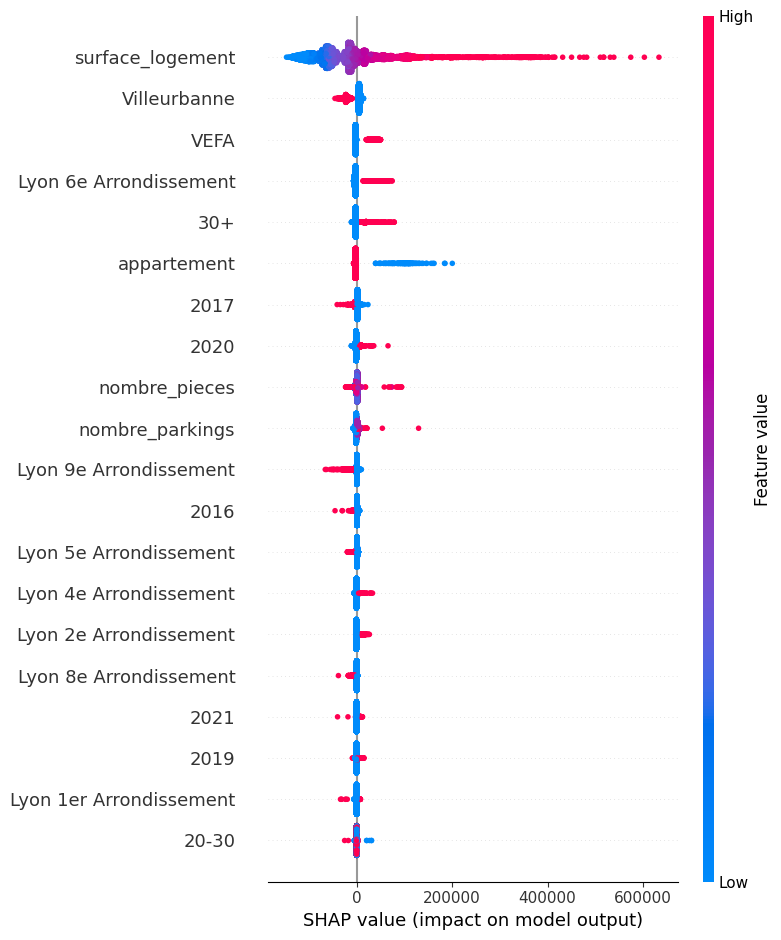

In [99]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values2,X_test,feature_names=lyon_housing_final.columns)

Same as the random forest regressor, they both value surface logement the most and shap values increase and decrease along with feature value